# Characteristics

In [145]:
import pandas as pd
from sklearn.metrics.cluster import contingency_matrix
from scipy.stats.contingency import association
import seaborn as sns

In [146]:
def cramersv(a, b):
    return association(contingency_matrix(a, b))

In [147]:
df = pd.read_csv('data/caracteristics.csv', encoding='latin1')

<ipython-input-147-9b4bedd28ad2>:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/caracteristics.csv', encoding='latin1')


In [148]:
def fill_with_most_common(df, column_name):
  most_common_value = df[column_name].mode()[0]
  df[column_name].fillna(most_common_value, inplace=True)

In [149]:
df.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0.0,590
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0.0,590
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,11.0,NaN,M,0.0,0.0,590
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,477.0,52 rue victor hugo,M,0.0,0.0,590
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,11.0,rue Joliot curie,M,0.0,0.0,590


In [150]:
df.rename(columns={'an': 'Year', 'mois': 'Month', 'jour': 'Day', 'hrmn': 'Time', 'lum': 'Lighting',
                   'dep': 'Department', 'com': 'Municipality', 'agg': 'Localisation', 'int': 'Intersection',
                   'atm': 'Atmospheric conditions', 'col': 'Collision type', 'adr': 'Address'}, inplace=True)

In [151]:
df.head()

,Num_Acc,Year,Month,Day,Time,Lighting,Localisation,Intersection,Atmospheric conditions,Collision type,Municipality,Address,gps,lat,long,Department
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0.0,590
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0.0,590
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,11.0,NaN,M,0.0,0.0,590
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,477.0,52 rue victor hugo,M,0.0,0.0,590
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,11.0,rue Joliot curie,M,0.0,0.0,590


## Year



Year of the accident

In [152]:
df['Year'].value_counts()

Year
5     87026
7     83850
6     82993
8     76767
9     74409
10    69379
11    66974
12    62250
14    59854
16    59432
15    58654
13    58397
Name: count, dtype: int64

In [153]:
df['Year'].isna().sum()

0

### !Important!

Too much data, so the year 2005 and 2006 is deleted from the dataframe.

These used outdated categories so the data we lost isn't very valuable anyway.

In [154]:
df = df[df['Year'] > 6]

## Month



Month of the accident

In [155]:
df['Month'].value_counts()

Month
10    63685
6     62027
9     61571
7     59371
5     57650
11    57442
4     54332
12    54290
3     52816
1     51212
8     49848
2     45722
Name: count, dtype: int64

In [156]:
df['Month'].isna().sum()

0

## Day



Day of the accident

In [157]:
df['Day'].value_counts()

Day
6     23046
10    23007
12    22820
7     22743
5     22692
9     22609
8     22589
16    22486
15    22429
4     22348
19    22258
11    22234
14    22228
21    22202
3     22096
17    22034
13    21987
18    21907
23    21769
2     21762
20    21748
22    21726
28    21452
24    21309
27    21159
26    21009
1     20995
25    20856
30    20337
29    20152
31    11977
Name: count, dtype: int64

In [158]:
df['Day'].isna().sum()

0

## Holiday columns prep

In [159]:
holiday_df = pd.read_csv('data/holidays.csv', encoding='latin1')

In [160]:
holiday_df['holiday'].value_counts()

holiday
New year                        12
Easter Monday                   12
Labour Day                      12
Ascension Thursday              12
Victory in Europe Day           12
Whit Monday                     12
Bastille Day                    12
Assumption of Mary to Heaven    12
All Saints Day                  12
Armistice Day                   12
Christmas Day                   12
Name: count, dtype: int64

In [161]:
# Convert ds column in holidays_df to datetime
holiday_df['ds'] = pd.to_datetime(holiday_df['ds'])

for holiday in holiday_df['holiday'].unique():
    df[holiday] = 0

In [162]:
# Add 2000 to the 'Year' column
df['Year'] += 2000
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df['Holiday'] = 0

In [163]:
holiday_map = {row['ds']: row['holiday'] for _, row in holiday_df.iterrows()}

for index, date in df['Date'].items():
    if date in holiday_map:
        holiday_name = holiday_map[date]
        df.at[index, holiday_name] = 1
        df.at[index, 'Holiday'] = 1

In [164]:
df.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)

In [165]:
df.columns

Index(['Num_Acc', 'Time', 'Lighting', 'Localisation', 'Intersection',
       'Atmospheric conditions', 'Collision type', 'Municipality', 'Address',
       'gps', 'lat', 'long', 'Department', 'New year', 'Easter Monday',
       'Labour Day', 'Ascension Thursday', 'Victory in Europe Day',
       'Whit Monday', 'Bastille Day', 'Assumption of Mary to Heaven',
       'All Saints Day', 'Armistice Day', 'Christmas Day', 'Date', 'Holiday'],
      dtype='object')

## Time



Time of the accident in hour and minutes (hhmm)

In [166]:
df['Time'].value_counts()

Time
1800    10369
1730     9389
1700     9186
1830     9065
1900     8208
        ...  
141         4
441         4
559         4
322         3
521         3
Name: count, Length: 1439, dtype: int64

In [167]:
df['Time'].isna().sum()

0

New category instead of time: **Time of day**

1 - Night (11 pm to 4 am)

2 - Dawn (4 am to 6 am)

3 - Morning (6 am to noon)

4 - Afternoon (noon to 6 pm)

5 - Evening (6 pm to 11 pm)

In [168]:
def map_time(time):
    if 2300 <= time < 400:
        return 1  # Night
    elif 400 <= time < 600:
        return 2  # Dawn
    elif 600 <= time < 1200:
        return 3  # Morning
    elif 1200 <= time < 1800:
        return 4  # Afternoon
    else:
        return 5  # Evening

df['Time_of_day'] = df['Time'].apply(map_time)
df.drop(['Time'], axis=1, inplace=True)

## Lighting

Lighting conditions in which the accident occurred

1 - Full day

2 - Twilight or dawn

3 - Night without public lighting

4 - Night with public lighting not lit

5 - Night with public lighting on

In [169]:
df['Lighting'].value_counts()

Lighting
1    460382
5    112592
3     51945
2     39414
4      5633
Name: count, dtype: int64

In [170]:
df['Lighting'].isna().sum()

0

### NEW ORDER

Light 1-5, 1 being well lit, 5 being no light!

1 - Full day

2 - Night with public lighting on

3 - Twilight or dawn

4 - Night with public lighting not lit

5 - Night without public lighting

In [171]:
mapping = {
    2: 3, # Twilight or dawn is nr 3 instead of 2
    3: 5, # Night without public lighting is nr 5 instead of 3
    5: 2  # Night with public lighting on is nr 2 instead of 5
}

df['Lighting'] = df['Lighting'].replace(mapping)

In [172]:
df['Lighting'].value_counts()

Lighting
1    460382
2    112592
5     51945
3     39414
4      5633
Name: count, dtype: int64

## Localisation & Address


**Localisation**

1 - Out of agglomeration

2 - In built-up areas

In [173]:
df['Localisation'].value_counts()

Localisation
2    459158
1    210808
Name: count, dtype: int64

In [174]:
df['Localisation'].isna().sum()

0

**Address**

Postal address: variable filled in for accidents occurring in built-up areas

In [175]:
df['Address'].value_counts()

Address
AUTOROUTE A1                2259
AUTOROUTE A86               2078
A13                         1936
A4                          1871
AUTOROUTE A6                1675
                            ... 
43, RUE DE LIEGE               1
21, RUE GERANDO                1
23, RUE SAULNIER               1
61, RUE DE MAUBEUGE            1
12, VIGOUREUX(RUE VICTOR       1
Name: count, Length: 297268, dtype: int64

In [176]:
df['Address'].isna().sum()

112622

Address row is useless

In [177]:
df.drop('Address', axis=1, inplace=True)

## Intersection

Type of Intersection:

1 - Out of intersection

2 - Intersection in X

3 - Intersection in T

4 - Intersection in Y

5 - Intersection with more than 4 branches

6 - Giratory

7 - Place

8 - Level crossing

9 - Other intersection

In [178]:
df['Intersection'].value_counts()

Intersection
1    476217
2     81866
3     58772
6     18954
9      9713
4      9419
5      8612
7      5573
8       743
0        97
Name: count, dtype: int64

In [179]:
df['Intersection'].isna().sum()

0

Not useful data

In [180]:
df.drop('Intersection', axis=1, inplace=True)

## Atmospheric conditions

Atmospheric conditions:

1 - Normal

2 - Light rain

3 - Heavy rain

4 - Snow - hail

5 - Fog - smoke

6 - Strong wind - storm

7 - Dazzling weather

8 - Cloudy weather

9 - Other

In [181]:
df['Atmospheric conditions'].value_counts()

Atmospheric conditions
1.0    541365
2.0     71084
8.0     21552
3.0     15082
7.0      6466
9.0      4866
5.0      4150
4.0      3741
6.0      1605
Name: count, dtype: int64

In [182]:
df['Atmospheric conditions'].isna().sum()

55

In [183]:
fill_with_most_common(df, 'Atmospheric conditions')

## Collision type

Type of collision:

1 - Two vehicles - frontal

2 - Two vehicles - from the rear

3 - Two vehicles - by the side

4 - Three vehicles and more - in chain

5 - Three or more vehicles - multiple collisions

6 - Other collision

7 - Without collision

In [184]:
df['Collision type'].value_counts()

Collision type
6.0    222679
3.0    191873
2.0     78372
7.0     70179
1.0     65198
5.0     21110
4.0     20544
Name: count, dtype: int64

In [185]:
df['Collision type'].isna().sum()

11

In [186]:
fill_with_most_common(df, 'Collision type')

## Municipality

The commune number is a code given by INSEE. The code has 3 numbers set to the right.

In [187]:
df['Municipality'].value_counts()

Municipality
55.0     25399
88.0     10419
113.0     8699
63.0      8263
7.0       8253
         ...  
768.0        1
790.0        1
828.0        1
816.0        1
916.0        1
Name: count, Length: 914, dtype: int64

In [188]:
df['Municipality'].isna().sum()

0

In [189]:
fill_with_most_common(df, 'Municipality')

## Department



INSEE Code (National Institute of Statistics and Economic Studies) of the departmeent followed by a 0 (201 Corse-du-Sud - 202 Haute-Corse)

In [190]:
df['Department'].value_counts()

Department
750    72162
130    41979
930    28194
920    26411
940    24864
       ...  
90       967
150      813
230      717
480      711
976      542
Name: count, Length: 101, dtype: int64

In [191]:
df['Department'].isna().sum()

0

Regions:

1. Auvergne-Rhône-Alpes
2. Bourgogne-Franche-Comté
3. Brittany
4. Centre-Val de Loire
5. Corsica
6. French Guiana
7. Grand Est
8. Guadeloupe
9. Hauts-de-France
10. Île-de-France
11. Martinique
12. Mayotte
13. Normandy
14. Nouvelle-Aquitaine
15. Occitanie
16. Pays de la Loire
17. Provence-Alpes-Côte d'Azur
18. Réunion

In [192]:
mapping = {
    10: "Auvergne-Rhône-Alpes", 30: "Auvergne-Rhône-Alpes", 70: "Auvergne-Rhône-Alpes", 150: "Auvergne-Rhône-Alpes",
    260: "Auvergne-Rhône-Alpes", 380: "Auvergne-Rhône-Alpes", 420: "Auvergne-Rhône-Alpes", 430: "Auvergne-Rhône-Alpes",
    630: "Auvergne-Rhône-Alpes", 690: "Auvergne-Rhône-Alpes", 730: "Auvergne-Rhône-Alpes",
    740: "Auvergne-Rhône-Alpes", 210: "Bourgogne-Franche-Comté", 250: "Bourgogne-Franche-Comté", 390: "Bourgogne-Franche-Comté",
    580: "Bourgogne-Franche-Comté", 700: "Bourgogne-Franche-Comté", 710: "Bourgogne-Franche-Comté", 890: "Bourgogne-Franche-Comté",
    900: "Bourgogne-Franche-Comté", 220: "Brittany", 290: "Brittany", 350: "Brittany", 560: "Brittany",
    180: "Centre-Val de Loire", 280: "Centre-Val de Loire", 360: "Centre-Val de Loire", 370: "Centre-Val de Loire",
    410: "Centre-Val de Loire", 450: "Centre-Val de Loire", 20: "Corsica", 201: "Corsica", 202: "Corsica", 973: "French Guiana",
    80: "Grand Est", 100: "Grand Est", 510: "Grand Est", 520: "Grand Est", 540: "Grand Est",
    550: "Grand Est", 570: "Grand Est", 670: "Grand Est", 680: "Grand Est", 880: "Grand Est",
    971: "Guadeloupe", 20: "Hauts-de-France", 590: "Hauts-de-France", 600: "Hauts-de-France", 620: "Hauts-de-France",
    800: "Hauts-de-France", 750: "Île-de-France", 770: "Île-de-France", 780: "Île-de-France",
    910: "Île-de-France", 920: "Île-de-France", 930: "Île-de-France", 940: "Île-de-France",
    950: "Île-de-France", 972: "Martinique", 976: "Mayotte", 140: "Normandy", 270: "Normandy",
    500: "Normandy", 610: "Normandy", 760: "Normandy", 160: "Nouvelle-Aquitaine", 170: "Nouvelle-Aquitaine",
    190: "Nouvelle-Aquitaine", 230: "Nouvelle-Aquitaine", 240: "Nouvelle-Aquitaine", 330: "Nouvelle-Aquitaine",
    400: "Nouvelle-Aquitaine", 470: "Nouvelle-Aquitaine", 640: "Nouvelle-Aquitaine", 790: "Nouvelle-Aquitaine",
    860: "Nouvelle-Aquitaine", 870: "Nouvelle-Aquitaine", 90: "Occitanie", 110: "Occitanie", 120: "Occitanie",
    300: "Occitanie", 310: "Occitanie", 320: "Occitanie", 340: "Occitanie", 460: "Occitanie",
    480: "Occitanie", 650: "Occitanie", 660: "Occitanie", 810: "Occitanie", 820: "Occitanie",
    440: "Pays de la Loire", 490: "Pays de la Loire", 530: "Pays de la Loire", 720: "Pays de la Loire",
    850: "Pays de la Loire", 40: "Provence-Alpes-Côte d'Azur", 50: "Provence-Alpes-Côte d'Azur",
    60: "Provence-Alpes-Côte d'Azur", 130: "Provence-Alpes-Côte d'Azur", 830: "Provence-Alpes-Côte d'Azur",
    840: "Provence-Alpes-Côte d'Azur", 974: "Réunion"
}

reverse_mapping = {
    "Auvergne-Rhône-Alpes": 1, "Bourgogne-Franche-Comté": 2, "Brittany": 3,
    "Centre-Val de Loire": 4, "Corsica": 5, "French Guiana": 6, "Grand Est": 7,
    "Guadeloupe": 8, "Hauts-de-France": 9, "Île-de-France": 10, "Martinique": 11,
    "Mayotte": 12, "Normandy": 13, "Nouvelle-Aquitaine": 14, "Occitanie": 15,
    "Pays de la Loire": 16, "Provence-Alpes-Côte d'Azur": 17, "Réunion": 18
}

df['Regions'] = df['Department'].map(mapping)

In [193]:
df['Regions'].value_counts()

Regions
Île-de-France                 197019
Provence-Alpes-Côte d'Azur     80117
Auvergne-Rhône-Alpes           64425
Nouvelle-Aquitaine             58084
Occitanie                      48887
Hauts-de-France                39775
Grand Est                      38444
Brittany                       25385
Pays de la Loire               25331
Normandy                       23730
Centre-Val de Loire            23043
Bourgogne-Franche-Comté        20340
Réunion                         7076
Corsica                         5371
Martinique                      4521
Guadeloupe                      4089
French Guiana                   3787
Mayotte                          542
Name: count, dtype: int64

In [194]:
df['Regions'] = df['Regions'].map(reverse_mapping)

In [195]:
df['Regions'].value_counts()

Regions
10    197019
17     80117
1      64425
14     58084
15     48887
9      39775
7      38444
3      25385
16     25331
13     23730
4      23043
2      20340
18      7076
5       5371
11      4521
8       4089
6       3787
12       542
Name: count, dtype: int64

In [196]:
df['Regions'].isna().sum()

0

## gps

**GPS coding: 1 originator character:**

M = Métropole

A = Antilles (Martinique or Guadeloupe)

G = Guyane

R = Réunion

Y = Mayotte

In [197]:
df['gps'].value_counts()

gps
M    303169
A      5625
R      3631
G      2096
Y       329
S         4
T         2
C         2
P         1
Name: count, dtype: int64

In [198]:
df['gps'].isna().sum()

355107

In [199]:
df.drop('gps', axis=1, inplace=True)

## Lon & Lat

In [200]:
df['long'].value_counts()

long
0.0          75509
0            32301
-             3209
345699.0       143
247391.0        41
             ...  
728009.0         1
732241.0         1
734638.0         1
737333.0         1
6127000.0        1
Name: count, Length: 141007, dtype: int64

In [201]:
df['long'].isna().sum()

358702

In [202]:
df['lat'].value_counts()

lat
0.0          88006
4.0          22481
5.0            406
4881740.0       60
4881750.0       57
             ...  
4518368.0        1
4516557.0        1
4517062.0        1
4559408.0        1
1626700.0        1
Name: count, Length: 112073, dtype: int64

In [203]:
df['lat'].isna().sum()

358698

In [204]:
print('Correct long coordinates:')
df.shape[0]-df['long'].isna().sum() - len(df[df['long'] == 0.0]) - len(df[df['long'] == '0']) - len(df[df['long'] == '-'])

Correct long coordinates:


200245

In [205]:
print('Correct lat coordinates:')
df.shape[0]-df['lat'].isna().sum() - len(df[df['lat'] == 0.0])

Correct lat coordinates:


223262

In [206]:
df.drop('long', axis=1, inplace=True)
df.drop('lat', axis=1, inplace=True)

## Holidays

I don't think we should keep if the event was on a specific holiday. We should only store if it was a holiday or not.

In [209]:
cols = list(df.columns)
cols[7:18]

['New year',
 'Easter Monday',
 'Labour Day',
 'Ascension Thursday',
 'Victory in Europe Day',
 'Whit Monday',
 'Bastille Day',
 'Assumption of Mary to Heaven',
 'All Saints Day',
 'Armistice Day',
 'Christmas Day']

In [210]:
df.drop(cols[7:18], axis=1, inplace=True)

# Result

In [211]:
df.head()

,Num_Acc,Lighting,Localisation,Atmospheric conditions,Collision type,Municipality,Department,Date,Holiday,Time_of_day,Regions
0,201600000001,1,2,8.0,3.0,5.0,590,2016-02-01,0,4,9
1,201600000002,1,2,1.0,6.0,5.0,590,2016-03-16,0,5,9
2,201600000003,1,1,1.0,6.0,11.0,590,2016-07-13,0,5,9
3,201600000004,3,2,7.0,3.0,477.0,590,2016-08-15,1,5,9
4,201600000005,1,2,1.0,3.0,11.0,590,2016-12-23,0,3,9


In [212]:
df.to_csv('data/characteristics_prepped.csv', index=False)

### Correlation

In [216]:
cols = list(df.columns)
cols = cols[1:5] + cols[7:]
cols

['Lighting',
 'Localisation',
 'Atmospheric conditions',
 'Collision type',
 'Date',
 'Holiday',
 'Time_of_day',
 'Regions']

<Axes: >

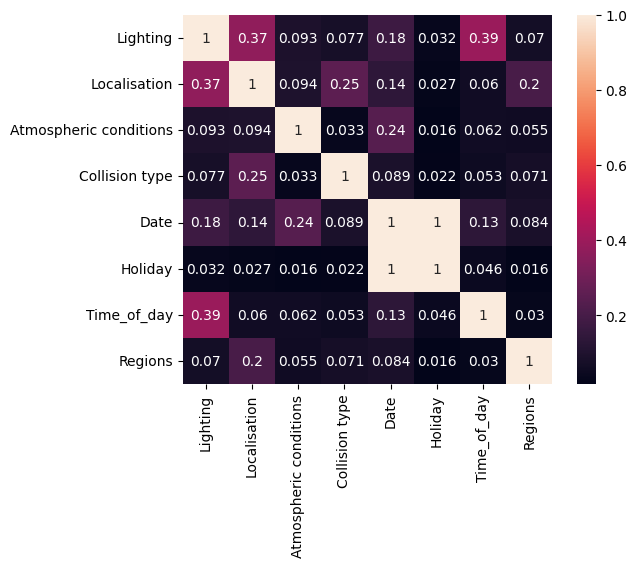

In [217]:
corr = df[cols].corr(method=cramersv, numeric_only=False)
sns.heatmap(corr, square=True, annot=True)

In [218]:
df.shape

(669966, 11)

# Notes

## Bad news

- **Municipality** or 'Commune number' is not really usable. Not sure what extra info could it give us, other than the place specificly. Commune number is to be used with Department to identify the specific commune. Usually needed to identify a certain address.

- **Address:** Very specific. A LOT of different addresses. I don't think we need this column

- **Department:** Practically postal code. Maybe keep only this, so we have a rough idea where it is, but commune number is too detailed in my opinion.

- **gps:** Missing for half of the data. Not sure what to fill the null values with (maybe add a placeholder category for the null values or yeet the column to the trash)

- **lon-lat:** About 230 000 are filled out correctly. Less then a quarter of the database. Coordinates should be yeeted in my opinion. Or at least normalized, and a placeholder value for the null/incorrect ones.


## Time

Maybe we should make an additional column which contains (yymmdd) number. Then maybe we could embed this continuity in the data itself. I would still keep month and day because they are useful for determining holidays, or to recognise spikes within the year.

## Categoric parameters

I would introduce dummy columns for most of the categoric data (except if it has something to do with space/time/continuity that can be expressed using numbers.
